**Ibale, Rolito Jr Mananquil BSCS 4-A**

**Activity #4** Deploying the model in local web app

#1. Data pre-processing (show your process)

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)


2.13.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#I load my dataset from a CSV file into a DataFrame named 'data_s'
#https://drive.google.com/file/d/1eWjz9aSE_mTL31wD-yYpeaHQQC2mfT_c/view?usp=sharing

file_id = '1eWjz9aSE_mTL31wD-yYpeaHQQC2mfT_c'
link = f'https://drive.google.com/uc?id={file_id}'
data_s = pd.read_csv(link)
data_s

#I display the first 7 rows of my DataFrame to get a glimpse of the data
data_s.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,Iloilo,192261.83
1,162597.70,151377.59,443898.53,Bacolod,191792.06
2,153441.51,101145.55,407934.54,Cebu,191050.39
3,144372.41,118671.85,383199.62,NaN,182901.99
4,142107.34,91391.77,366168.42,Iloilo,166187.94


<ipython-input-74-528d4f1f5d6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_s.corr(), cmap=custom_palette, annot=True, fmt=".2f")


Text(0.5, 1.0, 'Correlation Heatmap')

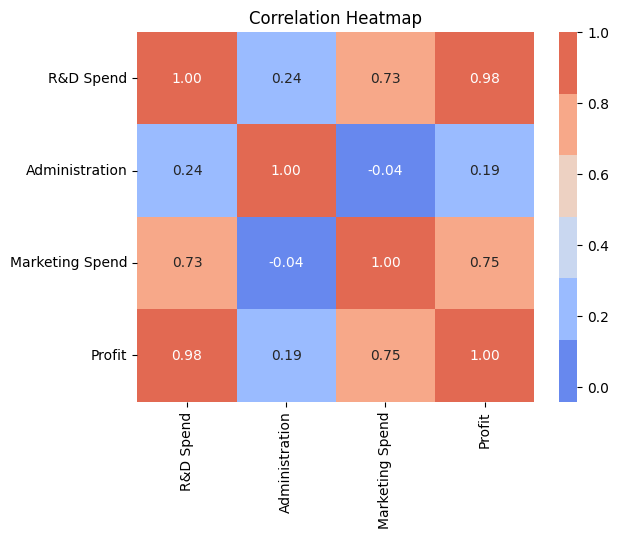

In [ ]:
custom_palette = sns.color_palette('coolwarm')
sns.heatmap(data_s.corr(), cmap=custom_palette, annot=True, fmt=".2f")

plt.title('Correlation Heatmap')

In [ ]:
data_st = data_s.drop(columns=['State', 'Administration', 'Marketing Spend'])

Text(-1.6249999999999911, 0.5, 'Profit')

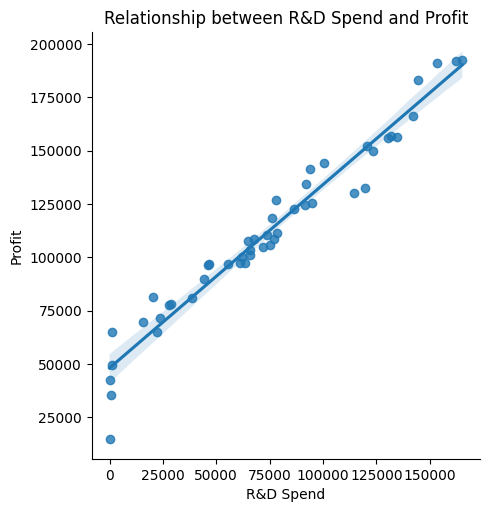

In [ ]:
sns.lmplot(x='R&D Spend', y='Profit', data=data_st)

# Add professional styling
plt.title('Relationship between R&D Spend and Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

In [ ]:
#I extract the independent variables (features) by selecting all rows and all columns except the last one
X = data_st.iloc[:, :-1].values

#I extract the dependent variable (target) by selecting all rows and only the last column
y = data_st.iloc[:, -1].values

#I print the independent and dependent variables
print("INDEPENDENT VARIABLE:\n", X)
print("DEPENDENT VARIABLE:\n", y)


INDEPENDENT VARIABLE:
 [[165349.2 ]
 [162597.7 ]
 [153441.51]
 [144372.41]
 [142107.34]
 [131876.9 ]
 [134615.46]
 [130298.13]
 [120542.52]
 [123334.88]
 [      nan]
 [100671.96]
 [ 93863.75]
 [ 91992.39]
 [119943.24]
 [114523.61]
 [ 78013.11]
 [ 94657.16]
 [ 91749.16]
 [ 86419.7 ]
 [ 76253.86]
 [ 78389.47]
 [ 73994.56]
 [ 67532.53]
 [ 77044.01]
 [ 64664.71]
 [ 75328.87]
 [ 72107.6 ]
 [ 66051.52]
 [ 65605.48]
 [ 61994.48]
 [ 61136.38]
 [ 63408.86]
 [ 55493.95]
 [ 46426.07]
 [ 46014.02]
 [      nan]
 [ 44069.95]
 [ 20229.59]
 [ 38558.51]
 [ 28754.33]
 [ 27892.92]
 [ 23640.93]
 [ 15505.73]
 [ 22177.74]
 [  1000.23]
 [  1315.46]
 [     0.  ]
 [   542.05]
 [     0.  ]]
DEPENDENT VARIABLE:
 [192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64 

In [ ]:
# Create a SimpleImputer instance with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the 'R&D Spend' column with the imputer
data_st['R&D Spend'] = imputer.fit_transform(data_st[['R&D Spend']])

# Display the updated DataFrame with missing values filled
print(data_st)

       R&D Spend     Profit
0   165349.20000  192261.83
1   162597.70000  191792.06
2   153441.51000  191050.39
3   144372.41000  182901.99
4   142107.34000  166187.94
5   131876.90000  156991.12
6   134615.46000  156122.51
7   130298.13000  155752.60
8   120542.52000  152211.77
9   123334.88000  149759.96
10   74072.99875  146121.95
11  100671.96000  144259.40
12   93863.75000  141585.52
13   91992.39000  134307.35
14  119943.24000  132602.65
15  114523.61000  129917.04
16   78013.11000  126992.93
17   94657.16000  125370.37
18   91749.16000  124266.90
19   86419.70000  122776.86
20   76253.86000  118474.03
21   78389.47000  111313.02
22   73994.56000  110352.25
23   67532.53000  108733.99
24   77044.01000  108552.04
25   64664.71000  107404.34
26   75328.87000  105733.54
27   72107.60000  105008.31
28   66051.52000  103282.38
29   65605.48000  101004.64
30   61994.48000   99937.59
31   61136.38000   97483.56
32   63408.86000   97427.84
33   55493.95000   96778.92
34   46426.07000   9

Text(-1.6249999999999911, 0.5, 'Profit')

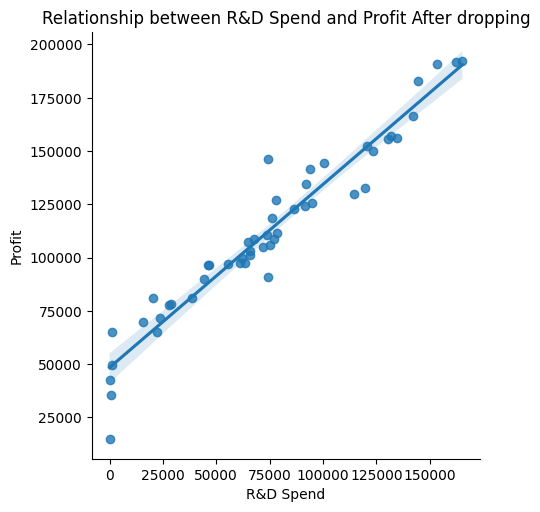

In [ ]:
sns.lmplot(x='R&D Spend', y='Profit', data=data_st)

# Add professional styling
plt.title('Relationship between R&D Spend and Profit After dropping')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

In [ ]:
data_st = data_st.drop(49)
data_st = data_st.drop(48)
data_st = data_st.drop(47)

Text(-1.7499999999999911, 0.5, 'Profit')

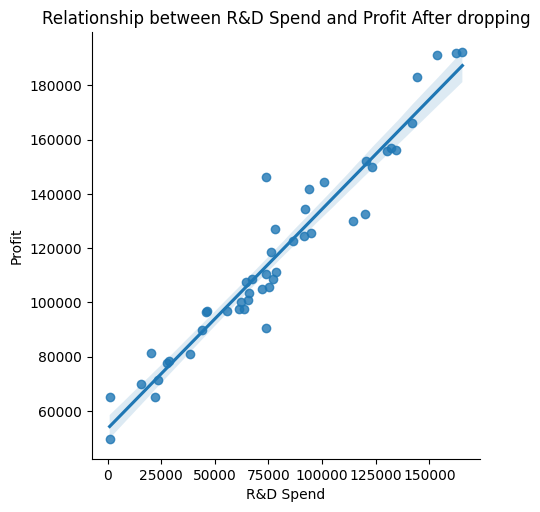

In [ ]:
sns.lmplot(x='R&D Spend', y='Profit', data=data_st)

# Add professional styling
plt.title('Relationship between R&D Spend and Profit After dropping')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

In [ ]:
#I extract the independent variables (features) by selecting all rows and all columns except the last one
X = data_st.iloc[:, :-1].values

#I extract the dependent variable (target) by selecting all rows and only the last column
y = data_st.iloc[:, -1].values

#I print the independent and dependent variables
print("INDEPENDENT VARIABLE:\n", X)
print("DEPENDENT VARIABLE:\n", y)


INDEPENDENT VARIABLE:
 [[165349.2    ]
 [162597.7    ]
 [153441.51   ]
 [144372.41   ]
 [142107.34   ]
 [131876.9    ]
 [134615.46   ]
 [130298.13   ]
 [120542.52   ]
 [123334.88   ]
 [ 74072.99875]
 [100671.96   ]
 [ 93863.75   ]
 [ 91992.39   ]
 [119943.24   ]
 [114523.61   ]
 [ 78013.11   ]
 [ 94657.16   ]
 [ 91749.16   ]
 [ 86419.7    ]
 [ 76253.86   ]
 [ 78389.47   ]
 [ 73994.56   ]
 [ 67532.53   ]
 [ 77044.01   ]
 [ 64664.71   ]
 [ 75328.87   ]
 [ 72107.6    ]
 [ 66051.52   ]
 [ 65605.48   ]
 [ 61994.48   ]
 [ 61136.38   ]
 [ 63408.86   ]
 [ 55493.95   ]
 [ 46426.07   ]
 [ 46014.02   ]
 [ 74072.99875]
 [ 44069.95   ]
 [ 20229.59   ]
 [ 38558.51   ]
 [ 28754.33   ]
 [ 27892.92   ]
 [ 23640.93   ]
 [ 15505.73   ]
 [ 22177.74   ]
 [  1000.23   ]
 [  1315.46   ]]
DEPENDENT VARIABLE:
 [192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 

#2. Create a multiple linear regression model to predict the profit.


In [ ]:
#I split the data into training and testing sets
#X_train and X_test contain the independent variables, while y_train and y_test contain the dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 1)

#I print the training and testing sets to inspect their contents
print("X Train:\n",X_train)
print("X Test:\n",X_test)
print("Y Train:\n",y_train)
print("Y Test:\n",y_test)

X Train:
 [[ 86419.7    ]
 [ 74072.99875]
 [  1315.46   ]
 [ 55493.95   ]
 [ 67532.53   ]
 [ 46426.07   ]
 [ 72107.6    ]
 [ 78389.47   ]
 [ 91992.39   ]
 [ 20229.59   ]
 [ 94657.16   ]
 [ 23640.93   ]
 [142107.34   ]
 [ 66051.52   ]
 [119943.24   ]
 [ 74072.99875]
 [ 27892.92   ]
 [ 61994.48   ]
 [ 61136.38   ]
 [ 28754.33   ]
 [ 76253.86   ]
 [ 91749.16   ]
 [ 64664.71   ]
 [134615.46   ]
 [130298.13   ]
 [ 22177.74   ]
 [162597.7    ]
 [ 78013.11   ]
 [165349.2    ]
 [114523.61   ]
 [131876.9    ]
 [100671.96   ]
 [123334.88   ]
 [120542.52   ]
 [ 93863.75   ]
 [ 15505.73   ]
 [ 44069.95   ]]
X Test:
 [[ 77044.01]
 [ 73994.56]
 [ 38558.51]
 [ 46014.02]
 [153441.51]
 [144372.41]
 [ 65605.48]
 [ 63408.86]
 [  1000.23]
 [ 75328.87]]
Y Train:
 [122776.86  90708.19  49490.75  96778.92 108733.99  96712.8  105008.31
 111313.02 134307.35  81229.06 125370.37  71498.49 166187.94 103282.38
 132602.65 146121.95  77798.83  99937.59  97483.56  78239.91 118474.03
 124266.9  107404.34 156122.51 155

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

print("TRAINING RESULT:\n",x_train)
print("TESTING RESULT:\n",x_test)

TRAINING RESULT:
 [[ 0.1517083 ]
 [-0.14549462]
 [-1.89687357]
 [-0.59271913]
 [-0.30293314]
 [-0.81099609]
 [-0.1928046 ]
 [-0.04159092]
 [ 0.28585099]
 [-1.44158317]
 [ 0.34999585]
 [-1.35946729]
 [ 1.49219016]
 [-0.33858319]
 [ 0.95866829]
 [-0.14549462]
 [-1.25711576]
 [-0.43624199]
 [-0.4568977 ]
 [-1.23638037]
 [-0.09299814]
 [ 0.27999609]
 [-0.3719657 ]
 [ 1.3118498 ]
 [ 1.20792543]
 [-1.39468839]
 [ 1.9854227 ]
 [-0.05065045]
 [ 2.05165527]
 [ 0.82820997]
 [ 1.24592871]
 [ 0.49478077]
 [ 1.04030996]
 [ 0.97309382]
 [ 0.33089733]
 [-1.5552933 ]
 [-0.8677113 ]]
TESTING RESULT:
 [[-0.07397809]
 [-0.14738275]
 [-1.00037961]
 [-0.82091473]
 [ 1.76501999]
 [ 1.54671366]
 [-0.34932001]
 [-0.40219583]
 [-1.90446161]
 [-0.11526398]]


In [ ]:
model = LinearRegression()

#Train the model on the training data using Multiple Linear Regression
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Accuracy: ", model.score(X_test,y_test)* 100)

Accuracy:  94.84902210364358


In [ ]:
Predicted = model.predict(X_test)
Predicted

array([115631.31746793, 113219.76066576,  85196.33105732,  91092.27486821,
       176047.75675817, 168875.75859636, 106585.53385833, 104848.40949073,
        55494.6059555 , 114274.95565394])

In [ ]:
y_pred = pd.DataFrame()   #dataframe for predictions vs actual y-values
y_pred['predictions'] = model.predict(X_test)

#Print the predictions
print(model.predict(X_test))
y_pred

[115631.31746793 113219.76066576  85196.33105732  91092.27486821
 176047.75675817 168875.75859636 106585.53385833 104848.40949073
  55494.6059555  114274.95565394]


,predictions
0,115631.317468
1,113219.760666
2,85196.331057
3,91092.274868
4,176047.756758
5,168875.758596
6,106585.533858
7,104848.409491
8,55494.605956
9,114274.955654


In [ ]:
df = {'Actual': y_test ,'Predicted': Predicted}
pd.DataFrame(df)

,Actual,Predicted
0,108552.04,115631.317468
1,110352.25,113219.760666
2,81005.76,85196.331057
3,96479.51,91092.274868
4,191050.39,176047.756758
5,182901.99,168875.758596
6,101004.64,106585.533858
7,97427.84,104848.409491
8,64926.08,55494.605956
9,105733.54,114274.955654


In [ ]:
from sklearn import metrics
import seaborn as seabornInstance

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7952.781201575401
Mean Squared Error: 77485585.846516
Root Mean Squared Error: 8802.589723854906


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, Predicted))

0.9484902210364358


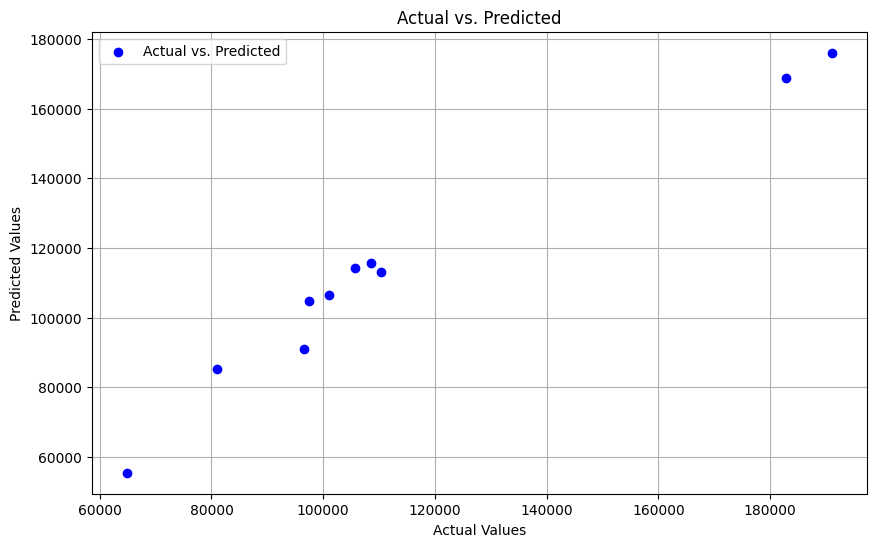

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(y_test, Predicted, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)

#Now it is Linear...

In [ ]:
# save the model to disk
import pickle
pickle.dump(model, open('model_act4.pkl','wb'))